## Introduction

How do various countries vote in the United Nations General Assembly, how have their voting patterns evolved throughout time, and how similarly or differently do they view certain issues?
Answering these questions (at a high level) is the focus of this analysis.

### Packages

We will use the **pandas**, **matplotlib**, and **seaborn** packages for data wrangling and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Used to remove warnings from Jupyter
import warnings
warnings.filterwarnings('ignore')

### Data

The data we're using originally come from the **unvotes** R package.
In the chunk below we modify the data by joining the various data frames provided in the package to help you get started with the analysis.

In [2]:
un_votes = pd.read_csv('data/un_votes.csv')
un_roll_calls = pd.read_csv('data/un_roll_calls.csv')
un_roll_call_issues = pd.read_csv('data/un_roll_call_issues.csv')

unvotes = un_votes.merge(un_roll_calls, on='rcid').merge(un_roll_call_issues, on='rcid')

## UN voting patterns

Let's create a data visualization that displays how the voting record of the UK, & NI changed over time on a variety of issues and compares it to two other countries: US and Turkey.

We can easily change which countries are being plotted by changing which countries the code filters for.
Note that the country name should be spelled and capitalized exactly the same way as it appears in the data.
See the [Appendix](#appendix) for a list of the countries in the data.

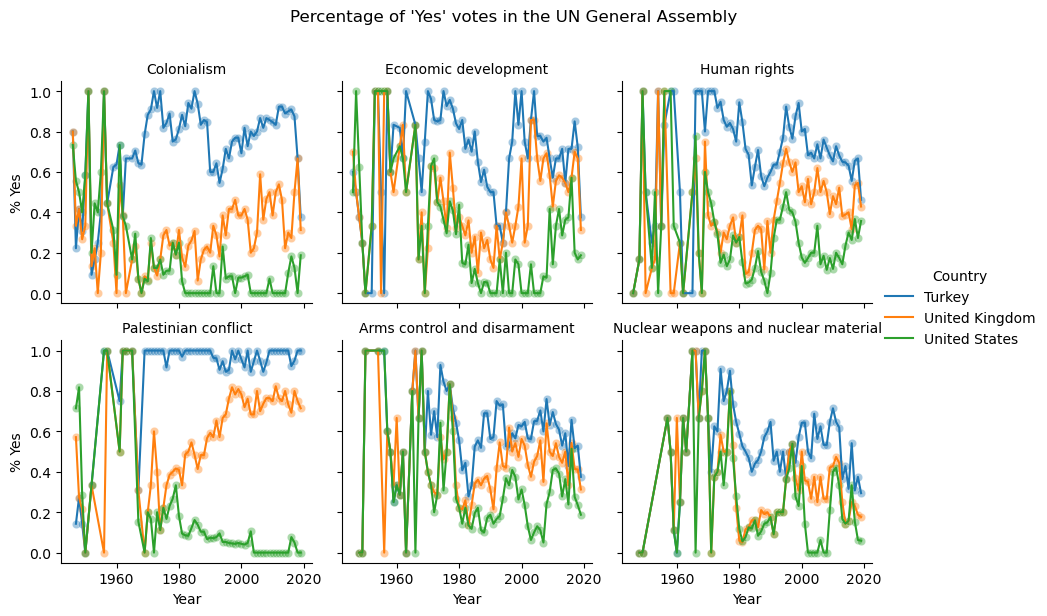

In [3]:
# Filter the data for the selected countries and prepare for plotting
filtered_unvotes = unvotes[unvotes['country'].isin(['United Kingdom', 'United States', 'Turkey'])]
filtered_unvotes['year'] = pd.to_datetime(filtered_unvotes['date']).dt.year

# Calculate the percentage of 'yes' votes per year, per country, per issue
percent_yes = filtered_unvotes.groupby(['country', 'year', 'issue'])['vote'].apply(lambda x: (x == 'yes').mean()).reset_index()
percent_yes.rename(columns={'vote': 'percent_yes'}, inplace=True)

# Create the faceted plot
g = sns.FacetGrid(percent_yes, col="issue", hue="country", col_wrap=3)
g.map(sns.scatterplot, "year", "percent_yes", alpha=0.4)
g.map(sns.lineplot, "year", "percent_yes")

# Adjust the labels and titles 
g.set_axis_labels("Year", "% Yes")
g.set_titles(col_template="{col_name}")
g.add_legend(title="Country")
g.fig.suptitle("Percentage of 'Yes' votes in the UN General Assembly", y=1.02)
plt.subplots_adjust(top=0.9)

plt.show()

## References

1.  David Robinson (2017). [unvotes](https://CRAN.R-project.org/package=unvotes): United Nations General Assembly Voting Data. R package version 0.2.0.
2.  Erik Voeten "Data and Analyses of Voting in the UN General Assembly" Routledge Handbook of International Organization, edited by Bob Reinalda (published May 27, 2013).
3.  Much of the analysis has been modeled on the examples presented in the [unvotes R package vignette](https://cran.r-project.org/web/packages/unvotes/vignettes/unvotes.html).

## Appendix

Below is a list of countries in the dataset:

In [4]:
# Assuming unvotes DataFrame is already loaded and available
countries = unvotes['country'].unique()
countries.sort()
countries_df = pd.DataFrame(countries, columns=['country'])
countries_df

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
195,Yemen People's Republic
196,Yugoslavia
197,Zambia
198,Zanzibar
